In [1]:
import pandas as pd
# Load the Data (handling encoding issues)
users = pd.read_csv('ml-1m/users.dat', sep='::', header=None, names=['userId', 'gender', 'age', 'occupation', 'zip'], engine='python', encoding='ISO-8859-1')
movies = pd.read_csv('ml-1m/movies.dat', sep='::', header=None, names=['movieId', 'title', 'genres'], engine='python', encoding='ISO-8859-1')
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', header=None, names=['userId', 'movieId', 'rating', 'timestamp'], engine='python', encoding='ISO-8859-1')

# Merge the Data
df = pd.merge(ratings, movies, on='movieId')
df = pd.merge(df, users, on='userId')


# Display the first few rows of the combined datasets
print(df.head(5))

   userId  movieId  rating  timestamp                                   title  \
0       1     1193       5  978300760  One Flew Over the Cuckoo's Nest (1975)   
1       1      661       3  978302109        James and the Giant Peach (1996)   
2       1      914       3  978301968                     My Fair Lady (1964)   
3       1     3408       4  978300275                  Erin Brockovich (2000)   
4       1     2355       5  978824291                    Bug's Life, A (1998)   

                         genres gender  age  occupation    zip  
0                         Drama      F    1          10  48067  
1  Animation|Children's|Musical      F    1          10  48067  
2               Musical|Romance      F    1          10  48067  
3                         Drama      F    1          10  48067  
4   Animation|Children's|Comedy      F    1          10  48067  


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   userId      1000209 non-null  int64 
 1   movieId     1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   title       1000209 non-null  object
 5   genres      1000209 non-null  object
 6   gender      1000209 non-null  object
 7   age         1000209 non-null  int64 
 8   occupation  1000209 non-null  int64 
 9   zip         1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


In [3]:
#checking null values
df.isnull().sum()

userId        0
movieId       0
rating        0
timestamp     0
title         0
genres        0
gender        0
age           0
occupation    0
zip           0
dtype: int64

In [4]:
#Check for duplicates in the dataset
int(df.duplicated().sum())

0

In [5]:
df.drop_duplicates(inplace=True)
int(df.duplicated().sum())

0

In [6]:
df.describe()

,userId,movieId,rating,timestamp,age,occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


In [7]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()
df = df.drop(columns = "timestamp")
df = df.drop(columns = "zip")
df.columns

Index(['userId', 'movieId', 'rating', 'title', 'genres', 'gender', 'age',
       'occupation'],
      dtype='object')

In [9]:
df['rating'].fillna(df['rating'].mean(), inplace=True)  # Example: fill missing ratings with the mean rating


/tmp/ipykernel_4519/1357624932.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mean(), inplace=True)  # Example: fill missing ratings with the mean rating


In [10]:
#changint the rating datatype to int
df['rating'] = df['rating'].astype(int)

In [11]:

# Step 7: Extract year from title
df['year'] = df['title'].str.extract(r'\((\d{4})\)')
df['year'] = df['year'].fillna(0).astype(int)

# Step 8: Remove the year part from title
# df['title'] = df['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True).str.strip()

# Step 9: Ensure 'genres' column is in string format
df['genres'] = df['genres'].astype(str)

# Step 10: Check for existing genre columns
existing_genre_columns = [col for col in df.columns if col in ['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

# Drop any existing genre columns to avoid overlap
df = df.drop(columns=existing_genre_columns, errors='ignore')

# Step 11: One-hot encoding for genres
genres_dummies = df['genres'].str.get_dummies(sep='|')
df = df.join(genres_dummies)


In [12]:
# #Normalize or standardize numerical features to bring all values into the same scale
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df[['rating']] = scaler.fit_transform(df[['rating']])

print(df['title'])

0          One Flew Over the Cuckoo's Nest (1975)
1                James and the Giant Peach (1996)
2                             My Fair Lady (1964)
3                          Erin Brockovich (2000)
4                            Bug's Life, A (1998)
                            ...                  
1000204                Weekend at Bernie's (1989)
1000205                   Crying Game, The (1992)
1000206           Welcome to the Dollhouse (1995)
1000207                    Sophie's Choice (1982)
1000208         E.T. the Extra-Terrestrial (1982)
Name: title, Length: 1000209, dtype: object


In [13]:
# lowercasing the titles
df['title'] = df['title'].str.lower()
# Example: Clipping ratings to be within a certain range
df['rating'] = df['rating'].clip(1, 5)

df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)
print(df.head())
df['gender'].isnull().sum()

   userId  movieId  rating                                   title  \
0       1     1193       5  one flew over the cuckoo's nest (1975)   
1       1      661       3        james and the giant peach (1996)   
2       1      914       3                     my fair lady (1964)   
3       1     3408       4                  erin brockovich (2000)   
4       1     2355       5                    bug's life, a (1998)   

                         genres  gender  age  occupation  year  Action  ...  \
0                         Drama       0    1          10  1975       0  ...   
1  Animation|Children's|Musical       0    1          10  1996       0  ...   
2               Musical|Romance       0    1          10  1964       0  ...   
3                         Drama       0    1          10  2000       0  ...   
4   Animation|Children's|Comedy       0    1          10  1998       0  ...   

   Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  \
0        0          0     

0

In [14]:
#checking there is no missing values
# df.isnull().sum()
# df = df.drop(columns = "(no genres listed)")

In [15]:
# preprocessed DataFrame is storing
df.to_csv('preprocessed_movies.csv', index=False)

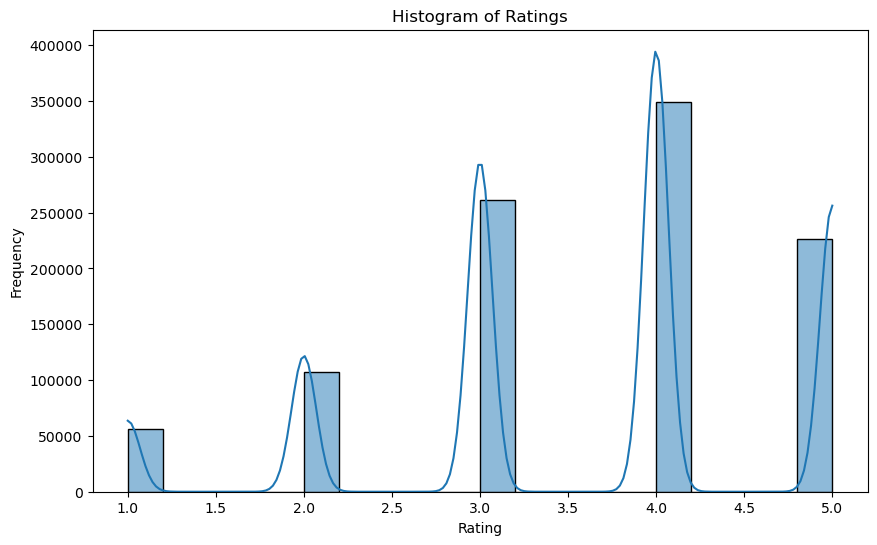

In [16]:
#histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data
df = pd.read_csv('preprocessed_movies.csv')

# Histogram of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

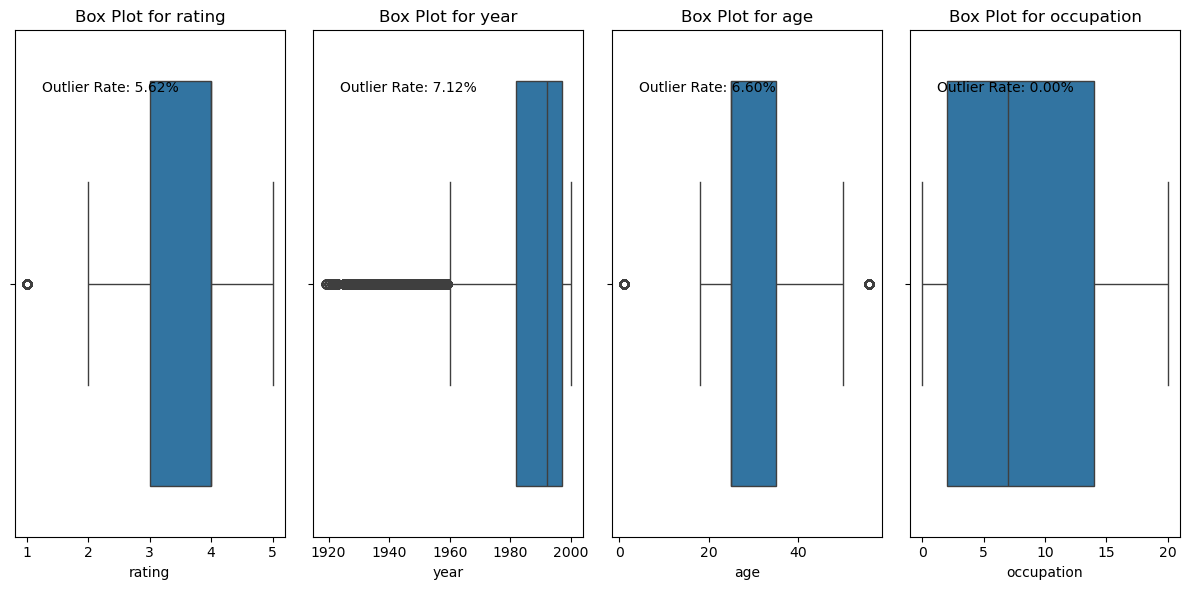

In [17]:
#box plot to check outliers
# Load your dataset
df = pd.read_csv('preprocessed_movies.csv')  # Replace with your file path

# Specify the features to visualize
selected_features = ['rating', 'year','age','occupation']  

# Function to calculate outlier rate
def calculate_outlier_rate(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    outlier_rate = outliers.mean()
    return outlier_rate

# Plot boxplots for selected features
plt.figure(figsize=(12, 6))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, len(selected_features), i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot for {feature}')
    plt.xlabel(feature)
    
    # Calculate and annotate outlier rate
    outlier_rate = calculate_outlier_rate(df[feature])
    plt.text(0.1, 0.9, f'Outlier Rate: {outlier_rate:.2%}', 
             horizontalalignment='left', verticalalignment='top', 
             transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [18]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Remove outliers from selected features
features = ['rating', 'year','age','occupation']  
for feature in features:
    df = remove_outliers_iqr(df, feature)

# Save the cleaned dataset
df.to_csv('preprocessed_movies.csv', index=False)


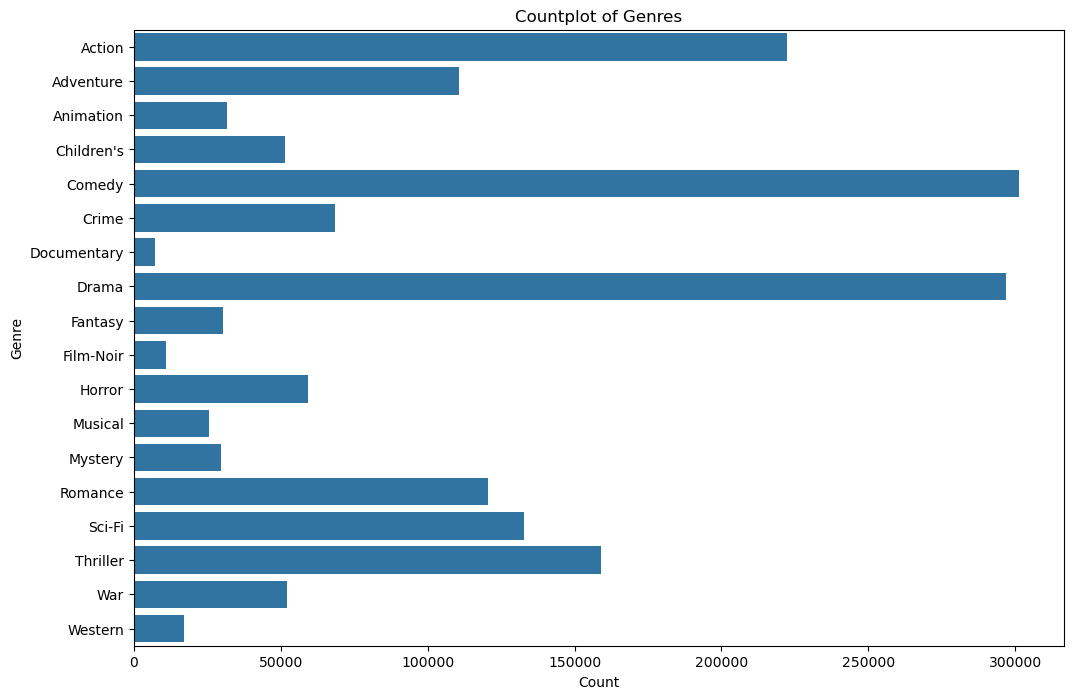

In [19]:
# Countplot of genres
# Note: You may need to melt or transform your DataFrame to use countplot effectively
# Assuming 'genres' column has multiple genres separated by '|'

# Create a DataFrame for genre counts
genre_counts = df['genres'].str.get_dummies(sep='|').sum().reset_index()
genre_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Genre', data=genre_counts)
plt.title('Countplot of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


Numeric Columns: Index(['userId', 'movieId', 'rating', 'gender', 'age', 'occupation', 'year',
       'Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


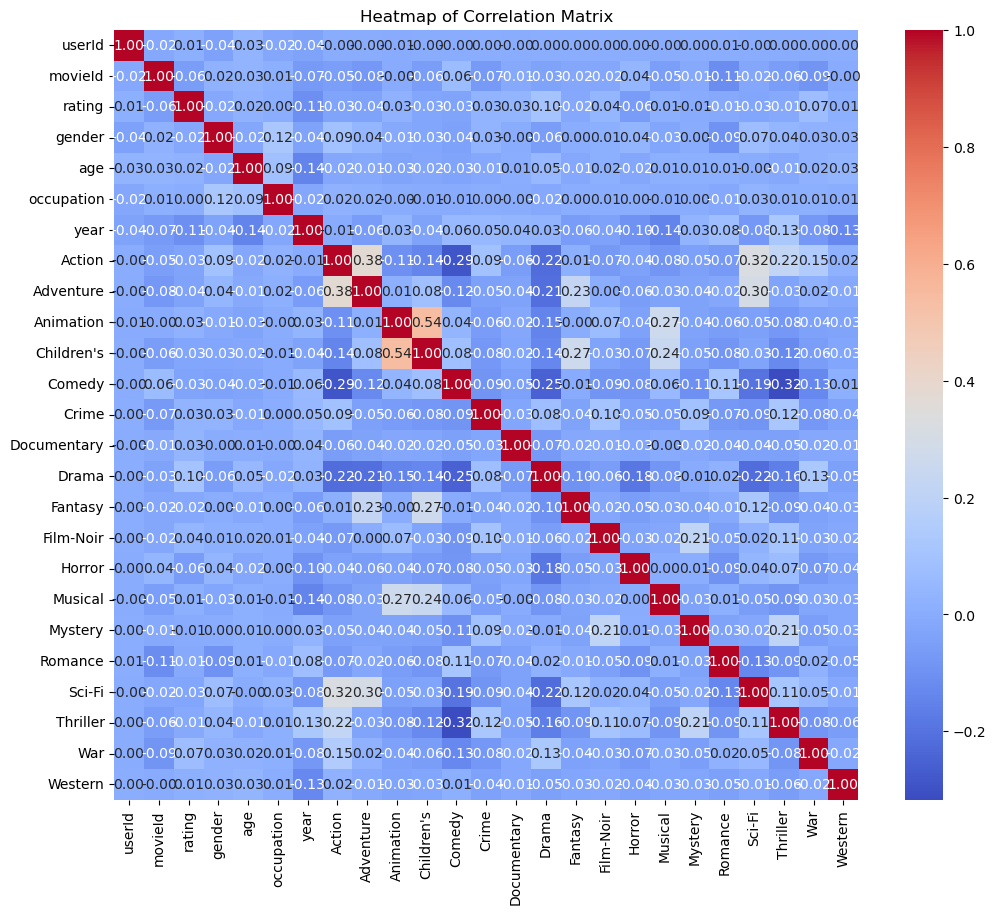

In [20]:

#heatmap
# Identify numeric columns
numeric_cols = df.select_dtypes(include='number').columns
print("Numeric Columns:", numeric_cols)

# Compute the correlation matrix
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()


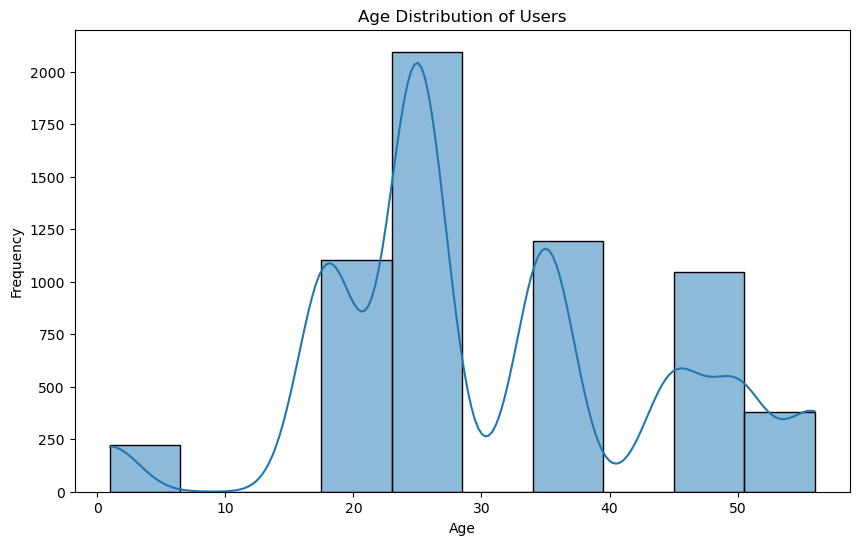

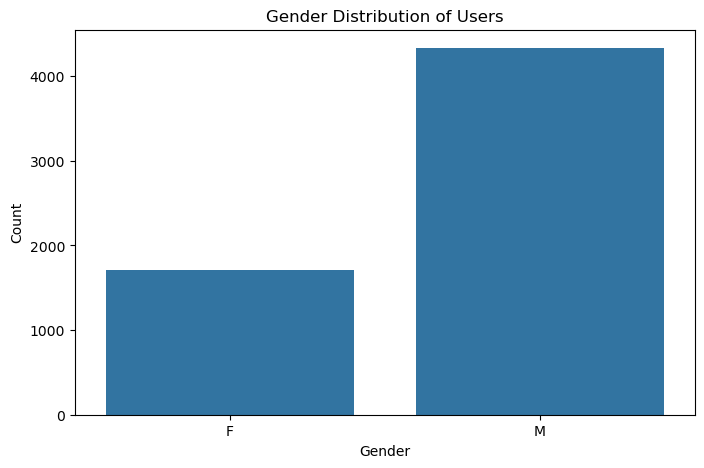

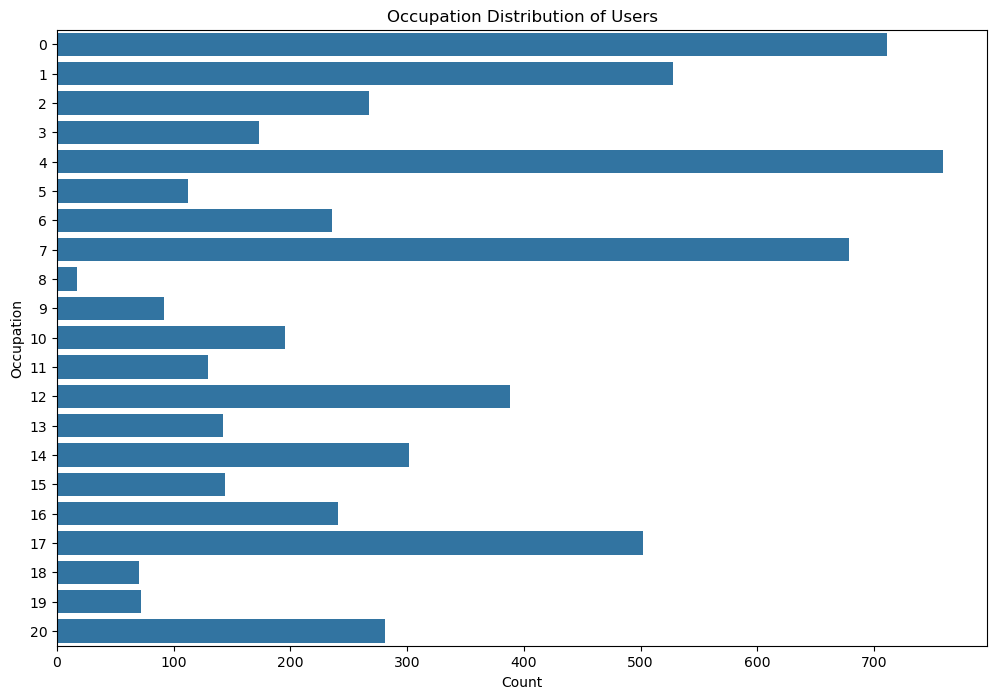

In [21]:
# Step 5: Analysis of User Demographics

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(users['age'], bins=10, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=users)
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Occupation Distribution
plt.figure(figsize=(12, 8))
sns.countplot(y='occupation', data=users)
plt.title('Occupation Distribution of Users')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

In [22]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

# Load the preprocessed dataset
df = pd.read_csv('preprocessed_movies.csv')

# Define feature columns and target
feature_cols = ['age', 'occupation', 'gender'] + [col for col in df.columns if col.startswith('Action') or col.startswith('Adventure') or col.startswith('Animation') or col.startswith('Children') or col.startswith('Comedy') or col.startswith('Crime') or col.startswith('Documentary') or col.startswith('Drama') or col.startswith('Fantasy') or col.startswith('Film-Noir') or col.startswith('Horror') or col.startswith('IMAX') or col.startswith('Musical') or col.startswith('Mystery') or col.startswith('Romance') or col.startswith('Sci-Fi') or col.startswith('Thriller') or col.startswith('War') or col.startswith('Western')]
X = df[feature_cols]
y = df['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Save the model to a file
joblib.dump(model, 'gradient_boosting_model.pkl')


Mean Squared Error: 0.868582603748225


['gradient_boosting_model.pkl']

In [23]:
# Evaluate the feature-based model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict the ratings on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Feature-Based Model Performance:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')


Feature-Based Model Performance:
Mean Squared Error (MSE): 0.87
Root Mean Squared Error (RMSE): 0.93
Mean Absolute Error (MAE): 0.79
R-squared (R²): 0.04


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import joblib

# Load preprocessed data
df = pd.read_csv('preprocessed_movies.csv')

# Define features and target variable
features = ['userId', 'age', 'occupation', 'rating', 'gender'] + list(df.columns[df.columns.str.startswith('Action')])
X = df[features]
y = df['movieId']  # Assuming movieId is the target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune the number of neighbors
knn.fit(X_train_scaled, y_train)



# Save the scaler and model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(knn, 'knn_model.pkl')



['knn_model.pkl']

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Predictions
y_pred_knn = knn.predict(X_test)
# Evaluation
print("K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)*100}')

# Confusion Matrix
confusion_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,3))
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/home/zoro/.local/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


K-Nearest Neighbors


/home/zoro/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zoro/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zoro/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       388
           2       0.00      0.00      0.00       106
           3       0.00      0.00      0.00        82
           4       0.00      0.00      0.00        32
           5       0.00      0.00      0.00        49
           6       0.00      0.00      0.00       198
           7       0.00      0.00      0.00        82
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00       159
          11       0.00      0.00      0.00       201
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        14
          14       0.00      0.00      0.00        23
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00       138
          17       0.00      0.00      0.00       144
          18       0.00    

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1 Score (assuming multi-class classification)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

#cross validation

from sklearn.model_selection import cross_val_score

# Cross-validation for accuracy
cv_accuracy = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()

print(f'Cross-Validation Accuracy: {cv_accuracy:.4f}')

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Convert predictions and true values to numeric if needed
y_test_numeric = np.array(y_test)
y_pred_numeric = np.array(y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_numeric, y_pred_numeric))

# Calculate MAE
mae = mean_absolute_error(y_test_numeric, y_pred_numeric)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')


/home/abhineeth/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/abhineeth/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/abhineeth/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.0003
Precision: 0.0002
Recall: 0.0003
F1 Score: 0.0002
Cross-Validation Accuracy: 0.0000
RMSE: 1724.6758
MAE: 1402.8983


In [3]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import pickle

# Load the preprocessed DataFrame
df = pd.read_csv('preprocessed_movies.csv')

# Prepare the data for Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# Split the data
trainset, testset = train_test_split(data, test_size=0.2)

# Build and train the model
model = SVD()
model.fit(trainset)

# Save the model
with open('svd_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Evaluate the model
predictions = model.test(testset)
accuracy.rmse(predictions)
accuracy.mse(predictions)


RMSE: 0.7860
MSE: 0.6179


0.6178623661747552